In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('C:\\Users\\dell\\Downloads\\Compressed\\P16-Recurrent-Neural-Networks\\Part 3 - Recurrent Neural Networks\\Google_Stock_Price_Train.csv')

In [3]:
training_set = training_set.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Sc = MinMaxScaler()
training_set = Sc.fit_transform(training_set)

In [6]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [8]:
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
classifier = Sequential()

In [11]:
classifier.add(LSTM(units = 4, activation = 'sigmoid',input_shape = (None, 1)))
classifier.add(Dense(units = 1))
classifier.compile(optimizer='adam',loss = 'mean_squared_error')
classifier.fit(X_train,y_train,batch_size=32,epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 955us/step - loss: 0.9898
Epoch 2/200
40/40 [==============================] - 0s 937us/step - loss: 0.8142
Epoch 3/200
40/40 [==============================] - 0s 936us/step - loss: 0.6677
Epoch 4/200
40/40 [==============================] - 0s 973us/step - loss: 0.5455
Epoch 5/200
40/40 [==============================] - 0s 978us/step - loss: 0.4442
Epoch 6/200
40/40 [==============================] - 0s 994us/step - loss: 0.3612
Epoch 7/200
40/40 [==============================] - 0s 984us/step - loss: 0.2934
Epoch 8/200
40/40 [==============================] - 0s 940us/step - loss: 0.2386
Epoch 9/200
40/40 [==============================] - 0s 989us/step - loss: 0.1948
Epoch 10/200
40/40 [==============================] - 0s 946us/step - loss: 0.1604
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 12/200
40/40 [==============================] - 0s 970us/step - loss: 0.1136
Epoch 13/200
40

40/40 [==============================] - 0s 973us/step - loss: 0.0015
Epoch 100/200
40/40 [==============================] - 0s 873us/step - loss: 0.0014
Epoch 101/200
40/40 [==============================] - 0s 936us/step - loss: 0.0013
Epoch 102/200
40/40 [==============================] - 0s 912us/step - loss: 0.0012
Epoch 103/200
40/40 [==============================] - 0s 940us/step - loss: 0.0011
Epoch 104/200
40/40 [==============================] - 0s 929us/step - loss: 0.0010
Epoch 105/200
40/40 [==============================] - 0s 909us/step - loss: 9.6051e-04
Epoch 106/200
40/40 [==============================] - 0s 898us/step - loss: 9.1051e-04
Epoch 107/200
40/40 [==============================] - 0s 888us/step - loss: 8.6640e-04
Epoch 108/200
40/40 [==============================] - 0s 945us/step - loss: 8.3097e-04
Epoch 109/200
40/40 [==============================] - 0s 945us/step - loss: 8.0070e-04
Epoch 110/200
40/40 [==============================] - 0s 946us/step -

40/40 [==============================] - 0s 980us/step - loss: 2.9808e-04
Epoch 193/200
40/40 [==============================] - 0s 981us/step - loss: 2.9492e-04
Epoch 194/200
40/40 [==============================] - 0s 963us/step - loss: 2.9465e-04
Epoch 195/200
40/40 [==============================] - 0s 976us/step - loss: 2.9486e-04
Epoch 196/200
40/40 [==============================] - 0s 977us/step - loss: 2.9037e-04
Epoch 197/200
40/40 [==============================] - 0s 982us/step - loss: 2.9319e-04
Epoch 198/200
40/40 [==============================] - 0s 939us/step - loss: 2.8745e-04
Epoch 199/200
40/40 [==============================] - 0s 938us/step - loss: 2.8633e-04
Epoch 200/200
40/40 [==============================] - 0s 955us/step - loss: 2.8628e-04


In [12]:
test_set = pd.read_csv('C:\\Users\\dell\\Downloads\\Compressed\\P16-Recurrent-Neural-Networks\\Part 3 - Recurrent Neural Networks\\Google_Stock_Price_Test.csv')

In [13]:
real_stock_price = test_set.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [14]:
inputs = real_stock_price
inputs = Sc.transform(inputs)

In [15]:
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = classifier.predict(inputs)
predicted_stock_price = Sc.inverse_transform(predicted_stock_price)

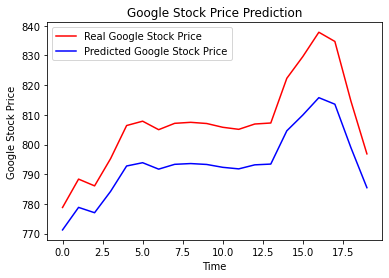

In [16]:
plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [17]:
import math
from sklearn.metrics import mean_squared_error

In [18]:
res = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price ))
res/800

0.018175908258009875